# Question 8 (C) EM Implementation

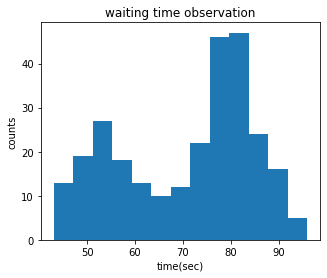

In [1]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from tabulate import tabulate
import seaborn as sns


x_data =np.loadtxt('waiting.txt',unpack=True)

plt.figure(figsize=(5,4))
plt.hist(x_data,bins =13)
plt.xlabel('time(sec)')
plt.ylabel('counts')
plt.title('waiting time observation')
# plt.show()


def w_i(x,pi,mu1,mu2,sigma1,sigma2):
        f1 = norm.pdf(x, mu1, sigma1) 
        f2 = norm.pdf(x, mu2, sigma2) 
        ans = pi*f1/((pi*f1)+((1-pi)*f2))
        return ans

def pi_k1_val(x_data,pi,mu1,mu2,sigma1,sigma2):
        n = len(x_data)
        W=[]
        for x in x_data:
                W.append(w_i(x,pi,mu1,mu2,sigma1,sigma2))
        ans = sum(W)/n
        return  ans  

def mu1_k1_val(x_data,pi,mu1,mu2,sigma1,sigma2):
        n = len(x_data)
        W_n=[]; W_d=[]
        for x in x_data:
                w_val = w_i(x,pi,mu1,mu2,sigma1,sigma2)
                W_n.append(w_val*x)
                W_d.append(w_val)
        return sum(W_n)/(sum(W_d))

def mu2_k1_val(x_data,pi,mu1,mu2,sigma1,sigma2):
        n = len(x_data)
        W_n=[]; W_d=[]
        for x in x_data:
                w_val = w_i(x,pi,mu1,mu2,sigma1,sigma2)
                W_n.append((1-w_val)*x)
                W_d.append((1-w_val))
        return sum(W_n)/(sum(W_d))

def sigma1_k1_val(x_data,pi,mu1,mu2,sigma1,sigma2,new_mu1):
        n = len(x_data)
        W_n=[]; W_d=[]
        for x in x_data:
                w_val = w_i(x,pi,mu1,mu2,sigma1,sigma2)
                W_n.append(w_val*(x-new_mu1)**2)
                W_d.append(w_val)
        return np.sqrt(sum(W_n)/(sum(W_d)))

def sigma2_k1_val(x_data,pi,mu1,mu2,sigma1,sigma2,new_mu2):
        n = len(x_data)
        W_n=[]; W_d=[]
        for x in x_data:
                w_val = w_i(x,pi,mu1,mu2,sigma1,sigma2)
                W_n.append((1-w_val)*(x-new_mu2)**2)
                W_d.append((1-w_val))
        return np.sqrt(sum(W_n)/(sum(W_d)))

def log_likelihood(x_data,pi,mu1,mu2,sigma1,sigma2):
        n = len(x_data)
        f_obs =[]
        for x in x_data:
                f1 =  norm.pdf(x, mu1, sigma1) 
                f2 =  norm.pdf(x, mu2, sigma2) 
                f_obs.append((pi*f1)+((1-pi)*f2))
        ans = np.prod(f_obs)
        return ans



# Question (e) for standard error functions

In [2]:
def simple_method(x_data):
    n = len(x_data)
    SE = np.sqrt(np.var(x_data)/n)
    return SE

def Jack_Knife(x_data):
    n_size= len(x_data)
    theta_hat = np.mean(x_data)
    Jack_theta =[]; 
    for index in range(n_size):
        new_t= x_data[:index] + x_data[index+1 :]
        theat_hat_star = np.mean(new_t)
        Jack_theta.append(theat_hat_star)
    jack_SE = np.sqrt(((n_size-1)/n_size)*np.sum((Jack_theta-theta_hat)**2))

    return jack_SE

def Bootstrap(B,x_data):
    n_size = len(x_data)
    Boot_theta=[]
    for _ in range(B):
        new_dis_sample=[];
        for _ in range(n_size):
            indx = np.random.uniform(0,len(x_data))
            indx = int(indx)
            new_dis_sample.append(x_data[indx])
        Boot_theta.append(np.mean(new_dis_sample))
    # Normal interval standard error methods
    Boot_SE = np.sqrt(np.var(Boot_theta))
    
    return Boot_SE

# Question 8 (c) 4 different Initial choice with different iterations

In [4]:
# Initial choice
pi_range =[0.6, 0.4, 0.6, 0.7]
mu1_range =[45,50,50,60]
mu2_range = [70,75,80,85]
sigma1_range = [10,5,8,10]

print('=========Question 8 (c)============')
print('')
 
theta_SE_normal = {'pi SE': [], 'mu1 SE':[], 'mu2 SE':[],'sigma1 SE':[],'sigma2 SE':[]}
theta_SE_jack = {'pi SE': [], 'mu1 SE':[], 'mu2 SE':[],'sigma1 SE':[],'sigma2 SE':[]}
theta_SE_boot = {'pi SE': [], 'mu1 SE':[], 'mu2 SE':[],'sigma1 SE':[],'sigma2 SE':[]}
for j in range(len(pi_range)):

    theta = {'pi': [pi_range[j]], 
            'mu1':[mu1_range[j]], 'mu2':[mu2_range[j]],
            'sigma1':[sigma1_range[j]],'sigma2':[sigma1_range[j]]}
    sub_theta = {'pi': [], 'mu1':[], 'mu2':[],'sigma1':[],'sigma2':[]}
    num_samples = 25

    # eps =10**(-4) #Epsilon value choose
    for i in range(num_samples+1): 
            curr_pi  = theta['pi'][i]
            curr_mu1 = theta['mu1'][i]
            curr_mu2 = theta['mu2'][i]
            curr_sigma1 = theta['sigma1'][i]
            curr_sigma2 = theta['sigma2'][i]

            new_pi = pi_k1_val(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2)
            new_mu1 = mu1_k1_val(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2)
            new_mu2 = mu2_k1_val(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2)
            new_sigma1 = sigma1_k1_val(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2,new_mu1)
            new_sigma2 = sigma2_k1_val(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2, new_mu2)

            Q_kth = log_likelihood(x_data, curr_pi, curr_mu1, curr_mu2, curr_sigma1, curr_sigma2)
            Q_k_1_th = log_likelihood(x_data, curr_pi, new_mu1, new_mu2 ,new_sigma1,new_sigma2)

            theta['pi'].append(new_pi)
            theta['mu1'].append(new_mu1)
            theta['mu2'].append(new_mu2)
            theta['sigma1'].append(new_sigma1)
            theta['sigma2'].append(new_sigma2)
            iteration = [1, 2, 3, 5, 10, 15, 20, 25]
            if i in iteration: 
                sub_theta['pi'].append(new_pi)
                sub_theta['mu1'].append(new_mu1)
                sub_theta['mu2'].append(new_mu2)
                sub_theta['sigma1'].append(new_sigma1)
                sub_theta['sigma2'].append(new_sigma2)

    theta_SE_normal['pi SE'].append(simple_method(theta['pi']))
    theta_SE_normal['mu1 SE'].append(simple_method(theta['mu1']))
    theta_SE_normal['mu2 SE'].append(simple_method(theta['mu2']))
    theta_SE_normal['sigma1 SE'].append(simple_method(theta['sigma1']))
    theta_SE_normal['sigma2 SE'].append(simple_method(theta['sigma2']))
    
    theta_SE_jack['pi SE'].append(Jack_Knife(theta['pi']))
    theta_SE_jack['mu1 SE'].append(Jack_Knife(theta['mu1']))
    theta_SE_jack['mu2 SE'].append(Jack_Knife(theta['mu2']))
    theta_SE_jack['sigma1 SE'].append(Jack_Knife(theta['sigma1']))
    theta_SE_jack['sigma2 SE'].append(Jack_Knife(theta['sigma2']))
    
    B=1000
    theta_SE_boot['pi SE'].append(Bootstrap(B,theta['pi']))
    theta_SE_boot['mu1 SE'].append(Bootstrap(B,theta['mu1']))
    theta_SE_boot['mu2 SE'].append(Bootstrap(B,theta['mu2']))
    theta_SE_boot['sigma1 SE'].append(Bootstrap(B,theta['sigma1']))
    theta_SE_boot['sigma2 SE'].append(Bootstrap(B,theta['sigma2']))
                
    print('=========Initial value choice========')
    print('[pi, mu1, mu2, sigma1 , sigma2] =  [', theta['pi'][0],',',theta['mu1'][0],',',theta['mu2'][0], ',',theta['sigma1'][0],',',theta['sigma2'][0], ']')

    print(tabulate(sub_theta, headers='keys', showindex = iteration,tablefmt ='fancy_grid'))

    print('========= Covergent values 25th========')
    print('[pi, mu1, mu2, sigma1 , sigma2] =  [', theta['pi'][-1],',',theta['mu1'][-1],',',theta['mu2'][-1], ',',theta['sigma1'][-1],',',theta['sigma2'][-1], ']')
    print('--------------------------------------------------------------------------------------------------------')
    print('')



=========Question 8 (c)============

=========Initial value choice========
[pi, mu1, mu2, sigma1 , sigma2] =  [ 0.6 , 45 , 70 , 10 , 10 ]
╒════╤══════════╤═════════╤═════════╤══════════╤══════════╕
│    │       pi │     mu1 │     mu2 │   sigma1 │   sigma2 │
╞════╪══════════╪═════════╪═════════╪══════════╪══════════╡
│  1 │ 0.286575 │ 53.0058 │ 78.0838 │  5.01702 │  8.23237 │
├────┼──────────┼─────────┼─────────┼──────────┼──────────┤
│  2 │ 0.30492  │ 53.1197 │ 78.6957 │  4.87954 │  7.41773 │
├────┼──────────┼─────────┼─────────┼──────────┼──────────┤
│  3 │ 0.318763 │ 53.4057 │ 79.0816 │  5.0113  │  6.95788 │
├────┼──────────┼─────────┼─────────┼──────────┼──────────┤
│  5 │ 0.338731 │ 53.9428 │ 79.5818 │  5.36267 │  6.40867 │
├────┼──────────┼─────────┼─────────┼──────────┼──────────┤
│ 10 │ 0.35778  │ 54.5135 │ 80.0243 │  5.78664 │  5.93553 │
├────┼──────────┼─────────┼─────────┼──────────┼──────────┤
│ 15 │ 0.360499 │ 54.602  │ 80.0829 │  5.86027 │  5.87592 │
├────┼──────────┼─────

# Question 8 (d) plot figure 

<Figure size 432x360 with 0 Axes>

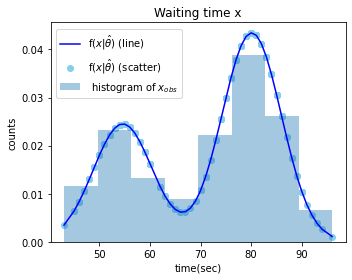

In [5]:
# plot figure 

plt.figure(figsize =(6,5))
def log_likelihood(x_data,pi,mu1,mu2,sigma1,sigma2):
        n = len(x_data)
        f_obs =[]
        for x in x_data:
            f1 =  norm.pdf(x, mu1, sigma1) 
            f2 =  norm.pdf(x, mu2, sigma2) 
            f_obs.append((pi*f1)+((1-pi)*f2))
        ans = f_obs
        return ans

y_data = log_likelihood(x_data,theta['pi'][-1]
                        ,theta['mu1'][-1],theta['mu2'][-1],
                        theta['sigma1'][-1],theta['sigma2'][-1])

new_x, new_y = zip(*sorted(zip(x_data, y_data)))


fig = plt.figure(figsize=(5,4))
sns.distplot(x_data,kde=False,norm_hist=True)
plt.scatter(x_data,y_data,color='skyblue')
plt.plot(new_x, new_y,color='blue')
plt.xlabel('time(sec)')
plt.ylabel('counts')
plt.title('Waiting time x')
fig.legend(labels=[r'f($x$|$\hat{\theta}$) (line)'
                   ,r'f($x$|$\hat{\theta}$) (scatter)'
                   ,' histogram of $x_{obs}$'], bbox_to_anchor=(0.53, 0.9))
plt.tight_layout()
plt.show()




# Question 8 (e): Standard Error

In [6]:
print('=========Question 8 (e)============')
print()
print('Initial Choice')
for i in range(4):
    print(i,'th iteration: [ pi mu1 mu2 sigma1 sigma2 ]= [ ',pi_range[i],mu1_range[i],mu2_range[i],sigma1_range[i],sigma1_range[i],']')

print()
print('=========Normal SE ============')
print(tabulate(theta_SE_normal, headers='keys', showindex = True,tablefmt ='fancy_grid'))
print('=========Jack knife SE ============')
print(tabulate(theta_SE_jack, headers='keys', showindex = True,tablefmt ='fancy_grid'))
print('=========Bootstrap B=1000 SE ============')
print(tabulate(theta_SE_boot, headers='keys', showindex = True,tablefmt ='fancy_grid'))


=========Question 8 (e)============

Initial Choice
0 th iteration: [ pi mu1 mu2 sigma1 sigma2 ]= [  0.6 45 70 10 10 ]
1 th iteration: [ pi mu1 mu2 sigma1 sigma2 ]= [  0.4 50 75 5 5 ]
2 th iteration: [ pi mu1 mu2 sigma1 sigma2 ]= [  0.6 50 80 8 8 ]
3 th iteration: [ pi mu1 mu2 sigma1 sigma2 ]= [  0.7 60 85 10 10 ]

=========Normal SE ============
╒════╤════════════╤══════════╤═══════════╤═════════════╤═════════════╕
│    │      pi SE │   mu1 SE │    mu2 SE │   sigma1 SE │   sigma2 SE │
╞════╪════════════╪══════════╪═══════════╪═════════════╪═════════════╡
│  0 │ 0.0104219  │ 0.351074 │ 0.378482  │   0.16778   │   0.207605  │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│  1 │ 0.00275491 │ 0.174207 │ 0.187081  │   0.0569103 │   0.0647959 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│  2 │ 0.00872244 │ 0.167264 │ 0.0106033 │   0.0779278 │   0.0779739 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│  3 │ 0.015